<a href="https://colab.research.google.com/github/lalopezpa/AlgorithmsUN2022II/blob/main/Lab2/lalopezpa_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
#%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

In [ ]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.6 MB/s 


In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
import time #for time calcs

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time
matmul(a, b)

CPU times: user 34 µs, sys: 6 µs, total: 40 µs
Wall time: 44.8 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
matmul(a, b)

IndexError: ignored

**My own example 3 - Chekcing the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if  len(A[0]) == len(B):
     for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
     return out
    else:
      return 'Not compatibility matrix A and B'

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time
matmul(a, b)

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 21 µs


'Not compatibility matrix A and B'

**My own example 5 - Deifining A and B that are compatiible for multiplcation**

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [5, 6, 5, 2]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(a, b)

CPU times: user 38 µs, sys: 6 µs, total: 44 µs
Wall time: 48.4 µs


[[20, 26, 26, 20], [28, 37, 38, 31], [52, 70, 74, 64], [8, 11, 12, 11]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.8112474285417534, 0.261268127260158, 0.37713701090027174],
 [0.29068556339023255, 0.9062424403061433, 0.9677875587627366]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

In [ ]:
st = time.time()
for i in range(10):
 matmul(randa, randb)
et = time.time()

elapsed_time_Py = (et - st)/10
print('Execution time:', elapsed_time_Py, 'seconds')

Execution time: 9.342546367645264 seconds


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
languages = {'Nombre':['Python'],'Average': [elapsed_time_Py]}
df = pd.DataFrame(data=languages)
df

,Nombre,Average
0,Python,9.342546


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
st = time.time()
for i in range(10):
 np.matmul(randa, randb)
et = time.time()

elapsed_time_Np = (et - st)/10
print('Execution time:', elapsed_time_Np, 'seconds')

Execution time: 0.0199786901473999 seconds


In [ ]:
df2 = pd.DataFrame({'Nombre':['NumPy'],'Average': [elapsed_time_Np]})
df = df.append(df2, ignore_index = True)
df

,Nombre,Average
0,Python,9.342546
1,NumPy,0.019979


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.15 s, sys: 76.1 ms, total: 9.23 s
Wall time: 9.19 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 13.3 ms, sys: 1.99 ms, total: 15.3 ms
Wall time: 17.4 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 205 µs, sys: 2 µs, total: 207 µs
Wall time: 218 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = random_matrix(2, 2)
B = random_matrix(2, 2)

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(xs, ys, result)
  double precision, intent(in) :: xs(:, :)
  double precision, intent(in) :: ys(:, :)
  double precision, dimension(size(xs, 1), size(ys, 2)), intent(out) :: result

  if (size(xs, 2) == size(ys, 1)) then
    do row = 1, size(xs, 1)
      do col = 1, size(ys, 2)
        do colxs = 1, size(xs, 2)
          result(row, col) = result(row, col) + xs(row, colxs) * ys(colxs, col)
        end do
      end do
    end do
  end if
 
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
mat_a = np.array([[1, 2], [3, 4]])
mat_b = np.array([[5, 6], [7, 8]])
fortran_matmul(mat_a, mat_b)

array([[19., 22.],
       [43., 50.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(xs, ys, result)
  double precision, intent(in) :: xs(:, :)
  double precision, intent(in) :: ys(:, :)
  double precision, dimension(size(xs, 1), size(ys, 2)), intent(out) :: result

  if (size(xs, 2) == size(ys, 1)) then
    do row = 1, size(xs, 1)
      do col = 1, size(ys, 2)
        do colxs = 1, size(xs, 2)
          result(row, col) = result(row, col) + xs(row, colxs) * ys(colxs, col)
        end do
      end do
    end do
  end if
 
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
rand_a = random_matrix(600, 100)
rand_b = random_matrix(100, 600)
fortran_matmul(rand_a, rand_b)

array([[27.87675099, 28.29261778, 31.52218249, ..., 28.57230091,
        27.12471253, 27.7313258 ],
       [26.48266   , 26.30755952, 28.8215647 , ..., 27.8271906 ,
        26.3433148 , 26.98768025],
       [29.66241881, 28.92876926, 30.89887968, ..., 30.07623714,
        28.33633072, 30.08898082],
       ...,
       [26.42583615, 27.46735409, 30.40384343, ..., 27.57216549,
        26.85191918, 26.60892299],
       [26.06456888, 25.02445329, 26.54633464, ..., 24.22612189,
        26.42461801, 26.17637213],
       [28.69538795, 27.15800696, 30.25971242, ..., 27.82305501,
        25.69647052, 25.9446644 ]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
st = time.time()
for i in range(10):
 fortran_matmul(randa, randb)
et = time.time()

elapsed_time_Ft = (et - st)/10
df3 = pd.DataFrame({'Nombre':['Fortranmagic'],'Average': [elapsed_time_Ft]})
df = df.append(df3, ignore_index = True)
df

,Nombre,Average
0,Python,9.342546
1,NumPy,0.019979
2,Fortranmagic,0.090955


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran
subroutine fortran_ten_matmul(xs, ys, result)
  double precision, intent(in) :: xs(:, :)
  double precision, intent(in) :: ys(:, :)
  double precision, dimension(size(xs, 1), size(ys, 2)), intent(out) :: result

  if (size(xs, 2) == size(ys, 1)) then
    do i = 1, 10
      do row = 1, size(xs, 1)
        do col = 1, size(ys, 2)
          do colxs = 1, size(xs, 2)
            result(row, col) = result(row, col) + xs(row, colxs) * ys(colxs, col)
          end do
        end do
      end do
    end do
  end if
 
end

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
fortran_matmul(rand_a, rand_b)

array([[27.87675099, 28.29261778, 31.52218249, ..., 28.57230091,
        27.12471253, 27.7313258 ],
       [26.48266   , 26.30755952, 28.8215647 , ..., 27.8271906 ,
        26.3433148 , 26.98768025],
       [29.66241881, 28.92876926, 30.89887968, ..., 30.07623714,
        28.33633072, 30.08898082],
       ...,
       [26.42583615, 27.46735409, 30.40384343, ..., 27.57216549,
        26.85191918, 26.60892299],
       [26.06456888, 25.02445329, 26.54633464, ..., 24.22612189,
        26.42461801, 26.17637213],
       [28.69538795, 27.15800696, 30.25971242, ..., 27.82305501,
        25.69647052, 25.9446644 ]])

**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
st = time.time()
fortran_ten_matmul(rand_a, rand_b)
et = time.time()

elapsed_time_Ftr = (et - st)/10
df4 = pd.DataFrame({'Nombre':['Fortran'],'Average': [elapsed_time_Ftr]})
df = df.append(df4, ignore_index = True)
df

,Nombre,Average
0,Python,9.342546
1,NumPy,0.019979
2,Fortranmagic,0.090955
3,Fortran,0.084299


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpc.c       
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define R1 600           // number of rows in Matrix-1
#define C1 100            // number of columns in Matrix-1
#define R2 100           // number of rows in Matrix-2
#define C2 600

void main() {
srand(time(NULL));
int mat1[R1][C1];
int mat2[R2][C2];

for (int i = 0; i< R1; i++){
  for(int j = 0; j< C1; j++){
    int n = rand() % 10;
    mat1[i][j]=n;
        
  }

}     

  for (int i = 0; i< R2; i++){
  for(int j = 0; j< C2; j++){
    int p = rand() % 10;
    mat2[i][j]=p;
          
  }
      
}     
      

int rslt[R1][C2];
    
  for (int i = 0 ; i < R1 ; i++ ){
    for (int k = 0 ; k < C2 ; k++ ) {
        rslt[i][k] = 0;
        for (int j = 0 ; j < R2 ; j++ ) {                          
          rslt[i][k] += mat1[i][j] * mat2[j][k];
        }
        }
}
}


Writing tmpc.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc tmpc.c -o tmpc
st = time.time()
for i in range(10):
 !./tmpc
et = time.time()
elapsed_time_c = (et - st)/10
print('Execution time:', elapsed_time_c, 'seconds')

Execution time: 0.21860013008117676 seconds


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
df5 = pd.DataFrame({'Nombre':['C'],'Average': [elapsed_time_c]})
df = df.append(df5, ignore_index = True)
df

,Nombre,Average
0,Python,9.342546
1,NumPy,0.019979
2,Fortranmagic,0.090955
3,Fortran,0.084299
4,C,0.218600


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpcc.cc      
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define R1 600           // number of rows in Matrix-1
#define C1 100            // number of columns in Matrix-1
#define R2 100           // number of rows in Matrix-2
#define C2 600

int main() {
srand(time(NULL));
int mat1[R1][C1];
int mat2[R2][C2];

for (int i = 0; i< R1; i++){
  for(int j = 0; j< C1; j++){
    int n = rand() % 10;
    mat1[i][j]=n;   
  }
}     

  for (int i = 0; i< R2; i++){
  for(int j = 0; j< C2; j++){
    int p = rand() % 10;
    mat2[i][j]=p;      
  }    
}     
      
int rslt[R1][C2];  
  for (int i = 0 ; i < R1 ; i++ ){
    for (int k = 0 ; k < C2 ; k++ ) {
        rslt[i][k] = 0;
        for (int j = 0 ; j < R2 ; j++ ) {                          
          rslt[i][k] += mat1[i][j] * mat2[j][k];
        }
        }
}
}


Writing tmpcc.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ tmpcc.cc -o tmpcc
st = time.time()
for i in range(10):
 !./tmpcc
et = time.time()
elapsed_time_cc = (et - st)/10
print('Execution time:', elapsed_time_cc, 'seconds')

Execution time: 0.2180560350418091 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
df6 = pd.DataFrame({'Nombre':['C++'],'Average': [elapsed_time_cc]})
df = df.append(df6, ignore_index = True)
df

,Nombre,Average
0,Python,9.342546
1,NumPy,0.019979
2,Fortranmagic,0.090955
3,Fortran,0.084299
4,C,0.218600
5,C++,0.218056


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.java
class Main{
  public static void main(String[] args) {
    int[][] a= new int[600][100];
    for (int x=0; x < a.length; x++) {
      for (int y=0; y < a[x].length; y++) {
        a[x][y] = (int) (Math.random()*9+1);
      }
    }
    int[][] b= new int[100][600];
    for (int x=0; x < b.length; x++) {
      for (int y=0; y < b[x].length; y++) {
        b[x][y] = (int) (Math.random()*9+1);
      }
    } 
    int[][] c = multiply(a, b);
  }

  public static int[][] multiply(int[][] a, int[][] b) {
  int[][] c = new int[a.length][b[0].length];
  if (a[0].length == b.length) {
    for (int i=0; i<10; i++){
      for (int l = 0; l < a.length; l++) {
          for (int j = 0; j < b[0].length; j++) {
              for (int k = 0; k < a[0].length; k++) {
                  // aquí se multiplica la matriz
                  c[i][j] += a[i][k] * b[k][j];
              }
          }
      }
    }
  }
  return c;
  }
}

Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
st = time.time()
!javac Main.java
!java Main
et = time.time()
elapsed_time_java = (et - st)/10
print('Execution time:', elapsed_time_java, 'seconds')

Execution time: 0.274811840057373 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
df7 = pd.DataFrame({'Nombre':['Java'],'Average': [elapsed_time_java]})
df = df.append(df7, ignore_index = True)
df

,Nombre,Average
0,Python,9.342546
1,NumPy,0.019979
2,Fortranmagic,0.090955
3,Fortran,0.084299
4,C,0.218600
5,C++,0.218056
6,Java,0.274812


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmp.js
var R1 = 600;
var C1 = 100;
var R2 = 100;
var C2 = 600;


function mulMat(mat1, mat2)
{
    
    var rslt = Array(R1).fill(0).map(()=>new Array(C2).fill(0));
    var i = 0;
    var j = 0;
    var k = 0;
    for (iter = 1; iter < 11; iter ++) {
      for (i = 0; i < R1; i++) {
        for (j = 0; j < C2; j++) {
            rslt[i][j] = 0;
            for (k = 0; k < R2; k++) {
                rslt[i][j] += mat1[i][k] * mat2[k][j];
            }
            //console.log(rslt[i][j] + " ");
        }
      }
      //console.log('Iteration', iter)
    }
    
    
}

mat1 = Array.from({length: R1}, () => Array.from({length: C1}, () => Math.random()));
mat2 = Array.from({length: R2}, () => Array.from({length: C2}, () => Math.random()));

mulMat(mat1, mat2);


Writing tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node tmp.js


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
st = time.time()
!node tmp.js
et = time.time()
elapsed_time_js = (et - st)/10
df8 = pd.DataFrame({'Nombre':['JavaScript'],'Average': [elapsed_time_js]})
df = df.append(df8, ignore_index = True)
df

,Nombre,Average
0,Python,9.342546
1,NumPy,0.019979
2,Fortranmagic,0.090955
3,Fortran,0.084299
4,C,0.218600
5,C++,0.218056
6,Java,0.274812
7,JavaScript,0.253234


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min = df.Average.min()
min

0.0199786901473999

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
avgs = df.Average
speed_f = [i/min for i in avgs]
df['Speed Factor'] = speed_f
df

,Nombre,Average,Speed Factor
0,Python,9.342546,467.625570
1,NumPy,0.019979,1.000000
2,Fortranmagic,0.090955,4.552591
3,Fortran,0.084299,4.219426
4,C,0.218600,10.941665
5,C++,0.218056,10.914431
6,Java,0.274812,13.755248
7,JavaScript,0.253234,12.675182


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values(by=['Average'])

,Nombre,Average,Speed Factor
1,NumPy,0.019979,1.000000
3,Fortran,0.084299,4.219426
2,Fortranmagic,0.090955,4.552591
5,C++,0.218056,10.914431
4,C,0.218600,10.941665
7,JavaScript,0.253234,12.675182
6,Java,0.274812,13.755248
0,Python,9.342546,467.625570


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 604 µs, sys: 9 µs, total: 613 µs
Wall time: 760 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.76 ms, sys: 1.01 ms, total: 2.77 ms
Wall time: 4.08 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 375 µs, sys: 6 µs, total: 381 µs
Wall time: 195 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

0.9954384686353508

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

FileNotFoundError: ignored

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 85 (delta 20), reused 17 (delta 10), pack-reused 52
Unpacking objects: 100% (85/85), done.


In [ ]:
!git clone <urlOfRepository>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git clone <urlOfRepository>'


In [ ]:
## Install package guthubdl, for documentation go http://githubdl.seso.io/
!pip install githubdl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!githubdl

usage: githubdl [-h] (-f FILE | -d DIR | -a | -b) -u URL [-t TARGET]
                [-g GIT_TOKEN] [-l LOG_LEVEL] [-r REFERENCE] [-s]
githubdl: error: the following arguments are required: -u/--url


In [ ]:
!githubdl -u https://github.com/ssanderson/pydata-toolbox -d demos -g 0260ccdcf10212d2a8f1d9ff6fbc7e55b00a4ad2

2022-09-07 00:12:31,917 - root         - INFO     - Retrieving a list of files for directory: demos
2022-09-07 00:12:31,918 - root         - INFO     - repo_name: ssanderson/pydata-toolbox api_path: contents request_string: /demos
2022-09-07 00:12:31,918 - root         - INFO     - Requesting file: demos at url: https://api.github.com/repos/ssanderson/pydata-toolbox/contents/demos
2022-09-07 00:12:32,021 - root         - CRITICAL - Unable to retrieve list of files from response.
 Exception: 'str' object has no attribute 'get'
 Response: {'message': 'Bad credentials', 'documentation_url': 'https://docs.github.com/rest'}
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/githubdl/request_processing.py", line 21, in get_files_from_json
    files.update({item.get("name"): item.get("type")})
AttributeError: 'str' object has no attribute 'get'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/l

In [ ]:
!pip install demos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
avocados = read_avocadata('2014', '2016')
avocados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: The default value of regex will change from True to False in a future version.


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

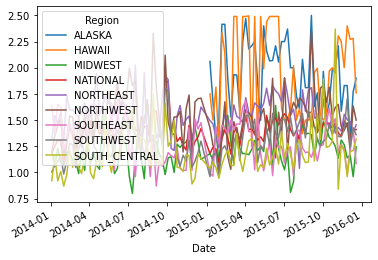

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

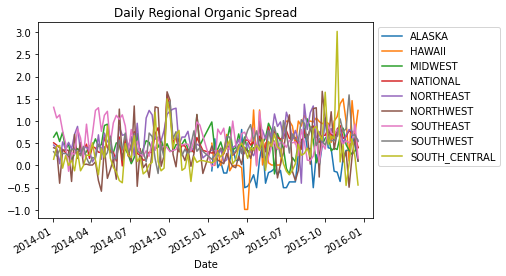

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Analysis Credits Granted by ICETEX

https://www.datos.gov.co/Educaci-n/Cr-ditos-Otorgados-por-ICETEX/f25k-w54z

In [ ]:
ICETEX = pd.read_csv('Cr_ditos_Otorgados_por_ICETEX.csv')
ICETEX

,SEXO,ESTRATO SOCIOECONÓMICO,CÓDIGO DE DEPARTAMENTO DE ORIGEN,DEPARTAMENTO DE ORIGEN,CATEGORÍA DEL MUNICIPIO DE ORIGEN,SECTOR IES,NIVEL DE FORMACIÓN,MODALIDAD DE LÍNEA,MODALIDAD DEL CRÉDITO,VIGENCIA,PERIODO OTORGAMIENTO,RANGO DEL VALOR TOTAL DESEMBOLSADO,NÚMERO DE NUEVOS BENEFICIARIOS DE CRÉDITO
0,FEMENINO,1,5,ANTIOQUIA,CIUDADES Y AGLOMERACIONES,OFICIAL,FORMACION TECNICA PROFESIONAL,PREGRADO,MATRICULA,2015,2015-1,I,1
1,FEMENINO,1,5,ANTIOQUIA,CIUDADES Y AGLOMERACIONES,OFICIAL,FORMACION TECNICA PROFESIONAL,PREGRADO,MATRICULA,2015,2015-1,IV,2
2,FEMENINO,1,5,ANTIOQUIA,CIUDADES Y AGLOMERACIONES,OFICIAL,FORMACION TECNICA PROFESIONAL,PREGRADO,MATRICULA,2015,2015-1,V,1
3,FEMENINO,1,5,ANTIOQUIA,CIUDADES Y AGLOMERACIONES,OFICIAL,TECNOLOGICA,PREGRADO,SOSTENIMIENTO,2015,2015-1,I,1
4,FEMENINO,1,5,ANTIOQUIA,CIUDADES Y AGLOMERACIONES,OFICIAL,UNIVERSITARIA,PREGRADO,MATRICULA,2015,2015-1,I,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64981,MASCULINO,6,76,VALLE DEL CAUCA,CIUDADES Y AGLOMERACIONES,PRIVADO,MAESTRIA,POSGRADO PAÍS,MATRICULA,2021,2021-2,IV,1
64982,MASCULINO,6,76,VALLE DEL CAUCA,CIUDADES Y AGLOMERACIONES,PRIVADO,MAESTRIA,POSGRADO PAÍS,MATRICULA,2021,2021-2,V,1
64983,MASCULINO,6,76,VALLE DEL CAUCA,CIUDADES Y AGLOMERACIONES,PRIVADO,UNIVERSITARIA,PREGRADO,MATRICULA,2021,2021-2,IV,3
64984,MASCULINO,6,76,VALLE DEL CAUCA,CIUDADES Y AGLOMERACIONES,PRIVADO,UNIVERSITARIA,PREGRADO,MATRICULA,2021,2021-2,V,7


Text(0.5, 1.0, 'Proportion of credits granted by gender')

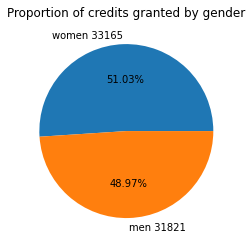

In [ ]:
sexo = ICETEX.SEXO.value_counts()
plt.pie(sexo, labels=['women '+str(sexo[0]), 'men '+str(sexo[1])], autopct= lambda p:f'{p:.2f}%')
plt.title('Proportion of credits granted by gender')

If we analyze the proportion of credits granted by gender, we will not obtain conclusive data. This implies that for institutions such as ICETEX there are no gender differences regarding who to grant credit to and who not to.

Text(0, 0.5, 'Students')

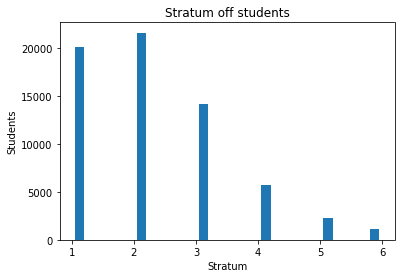

In [ ]:
stratum = ICETEX['ESTRATO SOCIOECONÓMICO']
plt.hist(stratum, bins=20, rwidth=.6)
plt.title('Stratum off students')
plt.xlabel('Stratum')
plt.ylabel('Students')

The number of credits is related to the stratum, the number of students from stratum 1 is even greater than the sum of strata 4, 5 and 6. This may be due to the economic diversification that implies living in different parts of the city, social norms have led to the understanding that the higher the stratum, the greater the amount of income.

Text(0.5, 1.0, 'Proportion of credits by modality of credit')

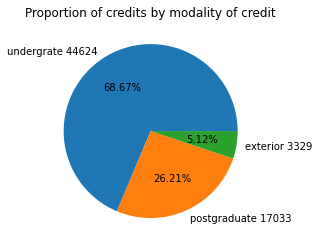

In [ ]:
formation = ICETEX['MODALIDAD DE LÍNEA'].value_counts()
plt.pie(formation, labels=['undergrate '+str(formation[0]), 'postgraduate '+str(formation[1]), 'exterior '+str(formation[2])], autopct= lambda p:f'{p:.2f}%')
plt.title('Proportion of credits by modality of credit')

Finally we can say that most of the income that ICETEX has is due to the granting of undergraduate credits. This is due to a student's lack of resources for pursuing an undergraduate degree that involves more time. A professional has a possible income due to the diversity of schedules of a postgraduate career, in addition, it is more likely that a professional obtains higher income according to his profession than a bachelor's student

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!